# IS 362 - Final Project

### Johnny Zgombic

**The first step is to import all of the necessary tools that we need to complete our tasks.**

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

**We now need to import our data which was downloaded into** *data_csv.csv* **and create a** *Pandas* **dataframe.**

In [245]:
csv    = 'data_csv.csv'
data   = pd.read_csv(csv, index_col=False)
awards = pd.DataFrame(data)
awards.head()

,year,category,winner,entity
0,1927,ACTOR,False,Richard Barthelmess
1,1927,ACTOR,True,Emil Jannings
2,1927,ACTRESS,False,Louise Dresser
3,1927,ACTRESS,True,Janet Gaynor
4,1927,ACTRESS,False,Gloria Swanson


**We now take the time to rename our columns appropriately and replacing the** *False* **values with** *Lost* **and the** *True* **values with** *Won* **so that it looks a little better.**

In [246]:
awards.rename(columns={'year':'Year','category':'Category','winner':'Outcome','entity':'Entity'},inplace=True)
awards['Outcome'].replace(False, 'Lost',inplace=True)
awards['Outcome'].replace(True, 'Won',inplace=True)
awards.head(5)

,Year,Category,Outcome,Entity
0,1927,ACTOR,Lost,Richard Barthelmess
1,1927,ACTOR,Won,Emil Jannings
2,1927,ACTRESS,Lost,Louise Dresser
3,1927,ACTRESS,Won,Janet Gaynor
4,1927,ACTRESS,Lost,Gloria Swanson


**Here, we just want to show the winning entities so we filter out only data that has** *Won* **in the** *Outcome* **column.**

In [247]:
awards_filtered = awards[awards['Outcome'] == 'Won']
awards_filtered.head(5)

,Year,Category,Outcome,Entity
1,1927,ACTOR,Won,Emil Jannings
3,1927,ACTRESS,Won,Janet Gaynor
6,1927,ART DIRECTION,Won,William Cameron Menzies
9,1927,CINEMATOGRAPHY,Won,Charles Rosher
10,1927,CINEMATOGRAPHY,Won,Karl Struss


**Here we map out the data in a bar graph to show the top 10 winners of Academy Awards.** 

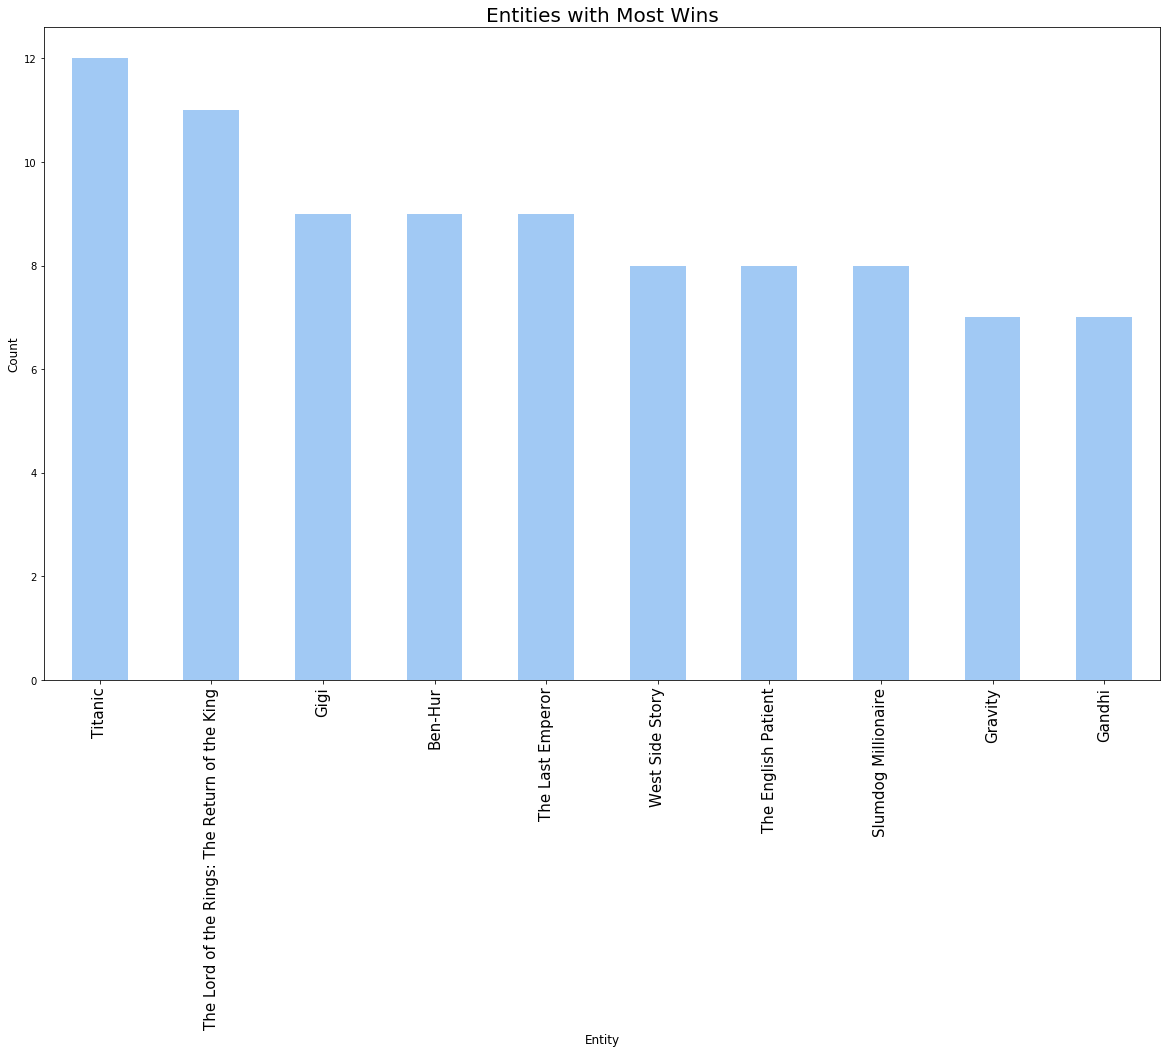

In [248]:
sns.set_palette('pastel')
plt.subplots(figsize=(20,12))
winners = awards_filtered['Entity'].groupby(awards['Entity']).count().sort_values(ascending=False)
plt.xlabel('Entity',size=12)
plt.xticks(size=15)
plt.ylabel('Count',size=12)
plt.title('Entities with Most Wins',size=20)
winners.head(10).plot('bar')

**Here we are getting a count of all the nominations given per year.**

In [249]:
awards.rename(columns={'Category':'Total Nominations'}, inplace=True)
awards_grouped = awards.groupby('Year').count()[['Total Nominations']]
awards_grouped.sort_values('Total Nominations', ascending=False).head(10)

,Total Nominations
Year,
1941,190
1942,190
1943,188
1944,180
1945,162
1940,162
1939,151
1998,150
2014,147


**Below you will find all the nominations for every year plotted in a bar chart.**

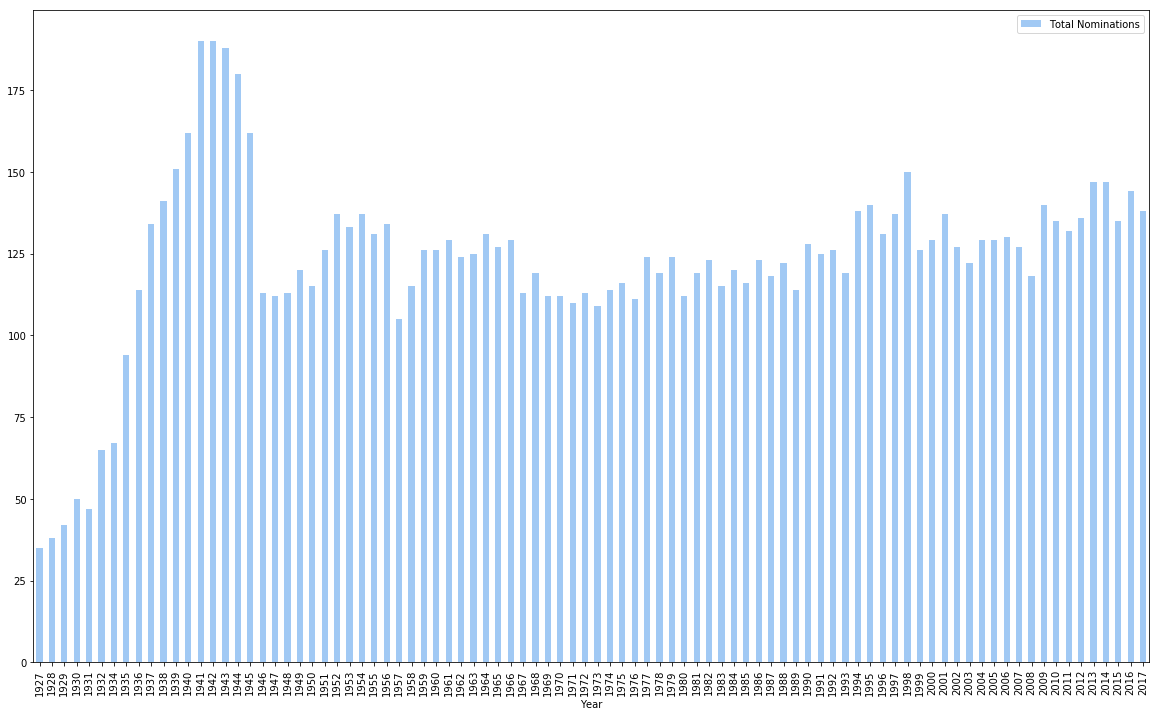

In [251]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
awards_grouped.plot.bar()

**Here you will find the mean value of the nominations both by number and a chart.**

Mean value for Nominations: 122.86666666666666


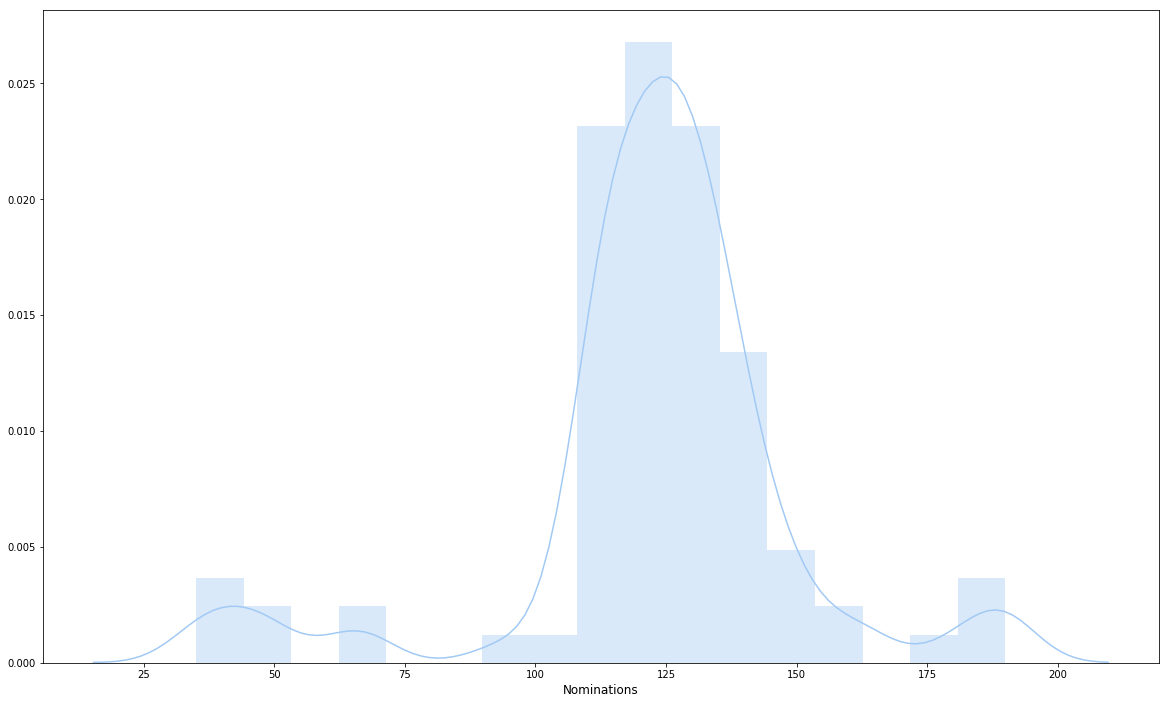

In [254]:
print('Mean value for Nominations:', awards_grouped['Total Nominations'].mean())
sns.distplot(awards_grouped['Total Nominations'])
plt.xlabel('Nominations',size=12)
plt.show()

**Here we are renaming the column** *Total Nominations* **back to** *Category* **so that we may use it for another task.**

In [255]:
awards.rename(columns={'Total Nominations':'Category'}, inplace=True)

**In the next two panes, we are simply filtering the main data to show only** *Film Editing* **and** *Best Picture* **as the results.**

In [258]:
awards_filmediting = awards[awards['Category'] == 'FILM EDITING']
awards_filmediting.head(5)

,Year,Category,Outcome,Entity
296,1934,FILM EDITING,Lost,Cleopatra
297,1934,FILM EDITING,Won,Eskimo
298,1934,FILM EDITING,Lost,One Night of Love
377,1935,FILM EDITING,Lost,David Copperfield
378,1935,FILM EDITING,Lost,The Informer


In [259]:
awards_bestpicture = awards[awards['Category'] == 'BEST PICTURE']
awards_bestpicture.head(5)

,Year,Category,Outcome,Entity
4107,1962,BEST PICTURE,Won,Lawrence of Arabia
4108,1962,BEST PICTURE,Lost,The Longest Day
4109,1962,BEST PICTURE,Lost,Meredith Willson's The Music Man
4110,1962,BEST PICTURE,Lost,Mutiny on the Bounty
4111,1962,BEST PICTURE,Lost,To Kill a Mockingbird


**We now need to import our second set data which was loaded into** *compare.csv* **and create a** *Pandas* **dataframe.**

In [260]:
csv2    = 'compare.csv'
columns = [2,4]
column_names = ['Won Film Editing', 'Won Best Picture']
data2   = pd.read_csv(csv2, sep=',', usecols=columns, names=column_names)
compare = pd.DataFrame(data2)
compare.head(5)

,Won Film Editing,Won Best Picture
0,n,n
1,n,n
2,n,n
3,n,n
4,y,n


#### Numeric Keys

Won Film Editing

- y = 0
- n = 1

Won Best Picture

- y = 10
- n = 11

In [210]:
compare['Won Film Editing'] = compare['Won Film Editing'].map({'y':0, 'n':1})
compare['Won Best Picture'] = compare['Won Best Picture'].map({'y':0, 'n':1})
compare.head(5)

,Won Film Editing,Won Best Picture
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1


**In the next two panes, we just create charts to show the total** *Won* **and** *Lost* **for the** *Film Editing* **and** *Best Picture* **categories.**

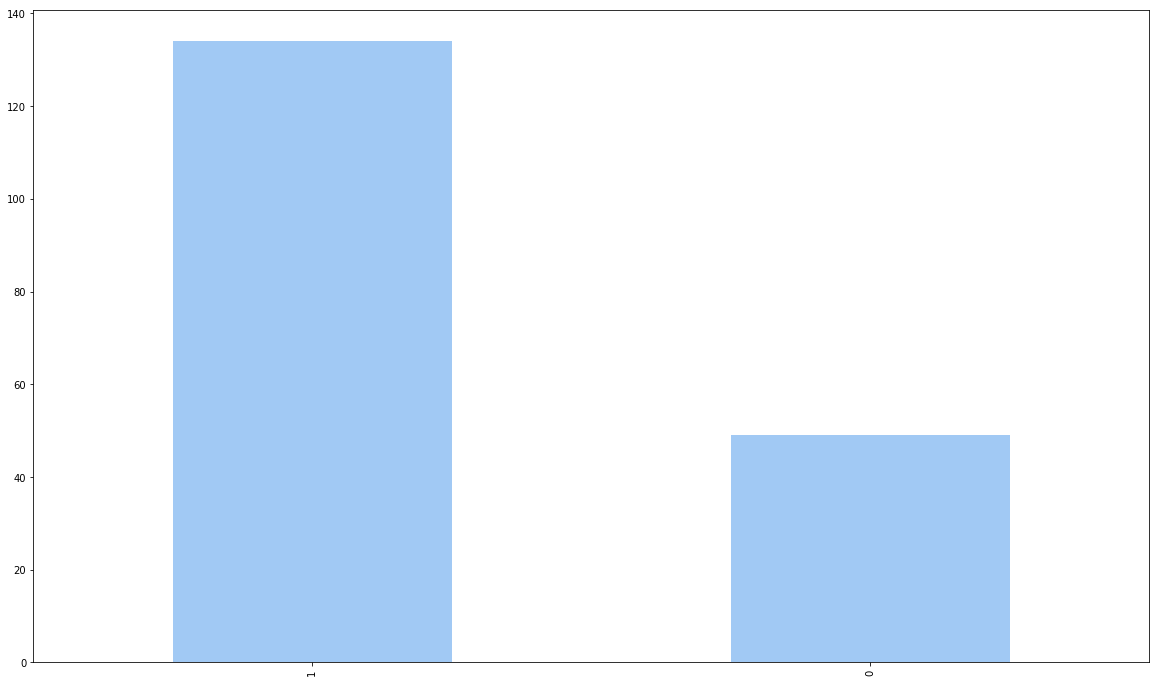

In [211]:
compare['Won Film Editing'].value_counts()[:20].plot(kind='bar')

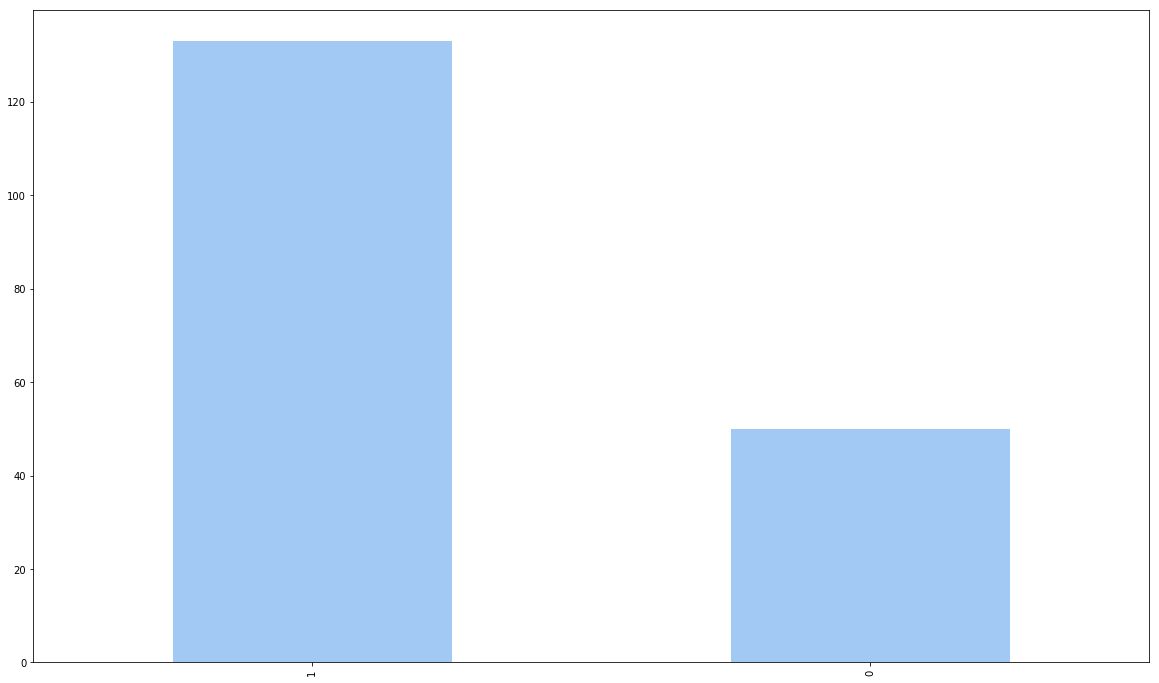

In [212]:
compare['Won Best Picture'].value_counts()[:20].plot(kind='bar')

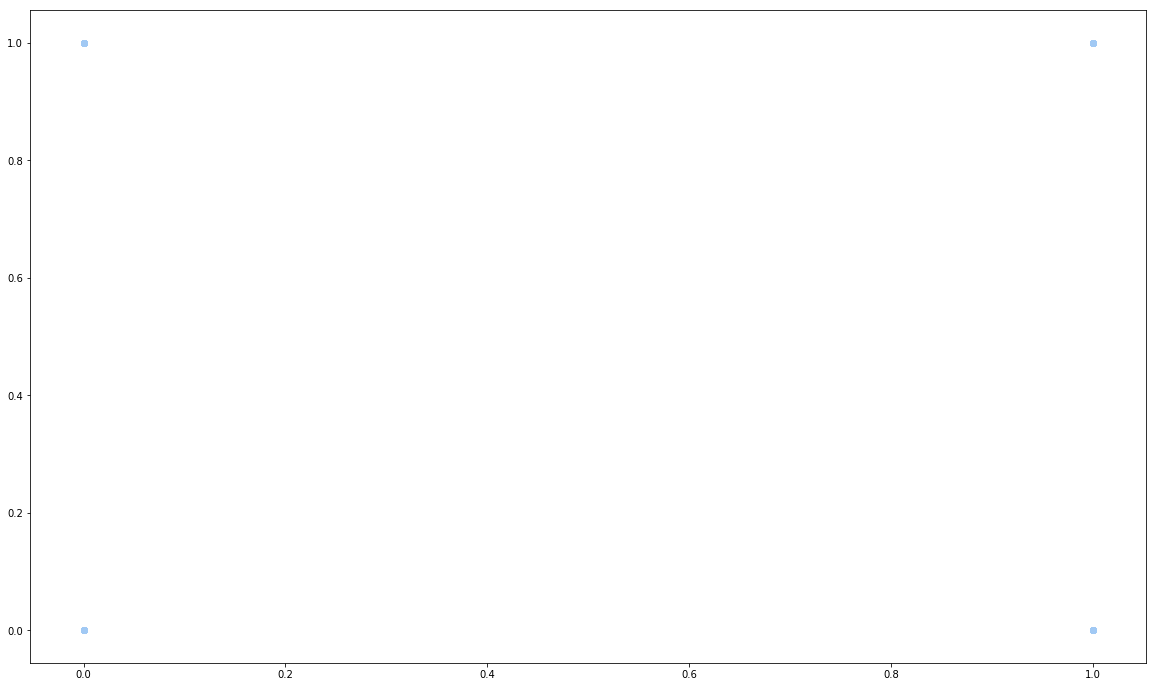

In [213]:
plt.scatter(x='Won Film Editing', y='Won Best Picture',data=compare)

### Conclusion  
  
**When plotting the data that was collected, we can see that there is clearly no indicator that a film will win best picture if they win best film editing. This is no surprise as the editing and the actual film are separate in their own right and the data that we compiled proved this.**